In [ ]:
!gdown --id 1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
!gdown --id 1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
To: /content/apps.csv
100% 134k/134k [00:00<00:00, 113MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv
To: /content/reviews.csv
100% 7.17M/7.17M [00:00<00:00, 92.5MB/s]


In [ ]:
import pandas as pd
df=pd.read_csv("/content/data.csv")

In [ ]:
df.shape


(5842, 2)

In [ ]:
df.size

11684

In [ ]:
df.columns


Index(['Sentence', 'Sentiment'], dtype='object')

In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("data.csv")

# Assuming text is in first column
text_col = df.columns[0]

# Function to count words in a row
def count_words(text):
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Add per-row word counts
df["word_count"] = df[text_col].apply(count_words)

# Add total words column (same value repeated for all rows)
total_words = df["word_count"].sum()
df["total_words"] = total_words

# Save updated CSV
df.to_csv("data_with_word_counts.csv", index=False)

print("File saved as data_with_word_counts.csv")


File saved as data_with_word_counts.csv


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("data.csv")

# Assuming the text is in the first column
text_col = df.columns[0]

# Function to count words in a row
def count_words(text):
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Add per-row word counts
df["word_count"] = df[text_col].apply(count_words)

# Calculate total words in dataset
total_words = df["word_count"].sum()
df["total_words"] = total_words

# Calculate unique words in dataset
all_words = " ".join(df[text_col].dropna().astype(str))
unique_words_total = len(set(all_words.split()))
df["unique_words_total"] = unique_words_total

# Save updated CSV
df.to_csv("data_with_word_stats.csv", index=False)

print("File saved as data_with_word_stats.csv")


File saved as data_with_word_stats.csv


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("data.csv")  # change path if needed

# Assuming the text is in the first column
text_col = df.columns[0]

# Function to count words in a row
def count_words(text):
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Add per-row word counts
df["word_count"] = df[text_col].apply(count_words)

# Calculate total words in dataset
total_words = df["word_count"].sum()
df["total_words"] = total_words

# Calculate unique words in dataset
all_words = " ".join(df[text_col].dropna().astype(str))
unique_words_total = len(set(all_words.split()))
df["unique_words_total"] = unique_words_total

# Save updated CSV
df.to_csv("data_with_word_stats.csv", index=False)

print("File saved as data_with_word_stats.csv")


File saved as data_with_word_stats.csv


In [ ]:
import pandas as pd
import re
import string

# Load CSV
df = pd.read_csv("data.csv")  # change path if needed

# Assuming the text is in the first column
text_col = df.columns[0]

# Function to compute features
def extract_features(text):
    if pd.isna(text):
        return pd.Series([0]*10)

    text_str = str(text)
    words = text_str.split()

    word_count = len(words)
    char_count = len(text_str)
    avg_word_length = sum(len(w) for w in words) / word_count if word_count > 0 else 0
    unique_words = set(words)
    unique_word_count = len(unique_words)
    unique_word_ratio = unique_word_count / word_count if word_count > 0 else 0

    sentences = re.split(r'[.!?]+', text_str.strip())
    sentences = [s for s in sentences if s]  # remove empty
    sentence_count = len(sentences)
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0

    punctuation_count = sum(1 for c in text_str if c in string.punctuation)
    digit_count = sum(c.isdigit() for c in text_str)
    uppercase_word_count = sum(1 for w in words if w.isupper())

    return pd.Series([
        word_count,
        char_count,
        avg_word_length,
        unique_word_count,
        unique_word_ratio,
        sentence_count,
        avg_sentence_length,
        punctuation_count,
        digit_count,
        uppercase_word_count
    ])

# Apply function to dataset
df[[
    "word_count",
    "char_count",
    "avg_word_length",
    "unique_word_count",
    "unique_word_ratio",
    "sentence_count",
    "avg_sentence_length",
    "punctuation_count",
    "digit_count",
    "uppercase_word_count"
]] = df[text_col].apply(extract_features)

# Save updated CSV
df.to_csv("data_with_text_features.csv", index=False)

print("File saved as data_with_text_features.csv")


File saved as data_with_text_features.csv


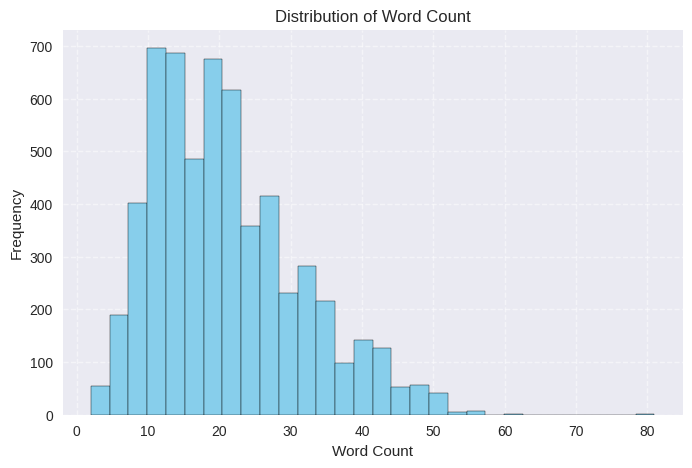

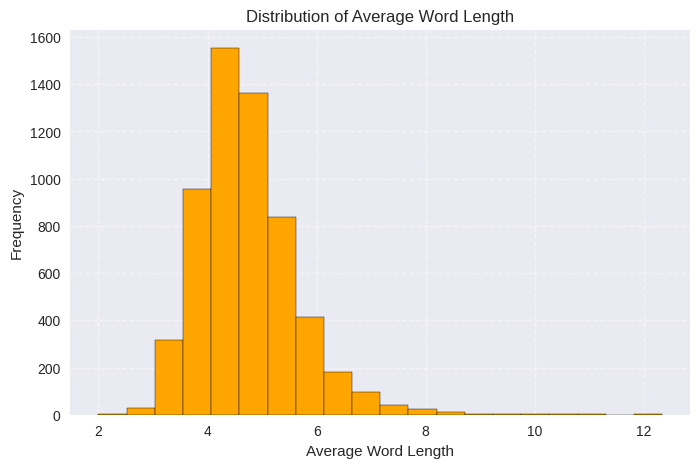

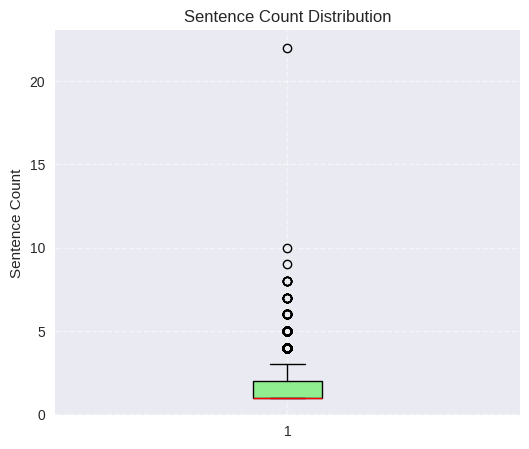

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load updated CSV with text features
df = pd.read_csv("data_with_text_features.csv")

# Set a clean style
plt.style.use("seaborn-v0_8")

# 1️⃣ Histogram of word counts
plt.figure(figsize=(8,5))
plt.hist(df["word_count"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 2️⃣ Histogram of average word length
plt.figure(figsize=(8,5))
plt.hist(df["avg_word_length"], bins=20, color="orange", edgecolor="black")
plt.title("Distribution of Average Word Length")
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 3️⃣ Boxplot comparing sentence count
plt.figure(figsize=(6,5))
plt.boxplot(df["sentence_count"], vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightgreen", color="black"),
            medianprops=dict(color="red"))
plt.title("Sentence Count Distribution")
plt.ylabel("Sentence Count")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 4️⃣ Scatter plot: word count vs u


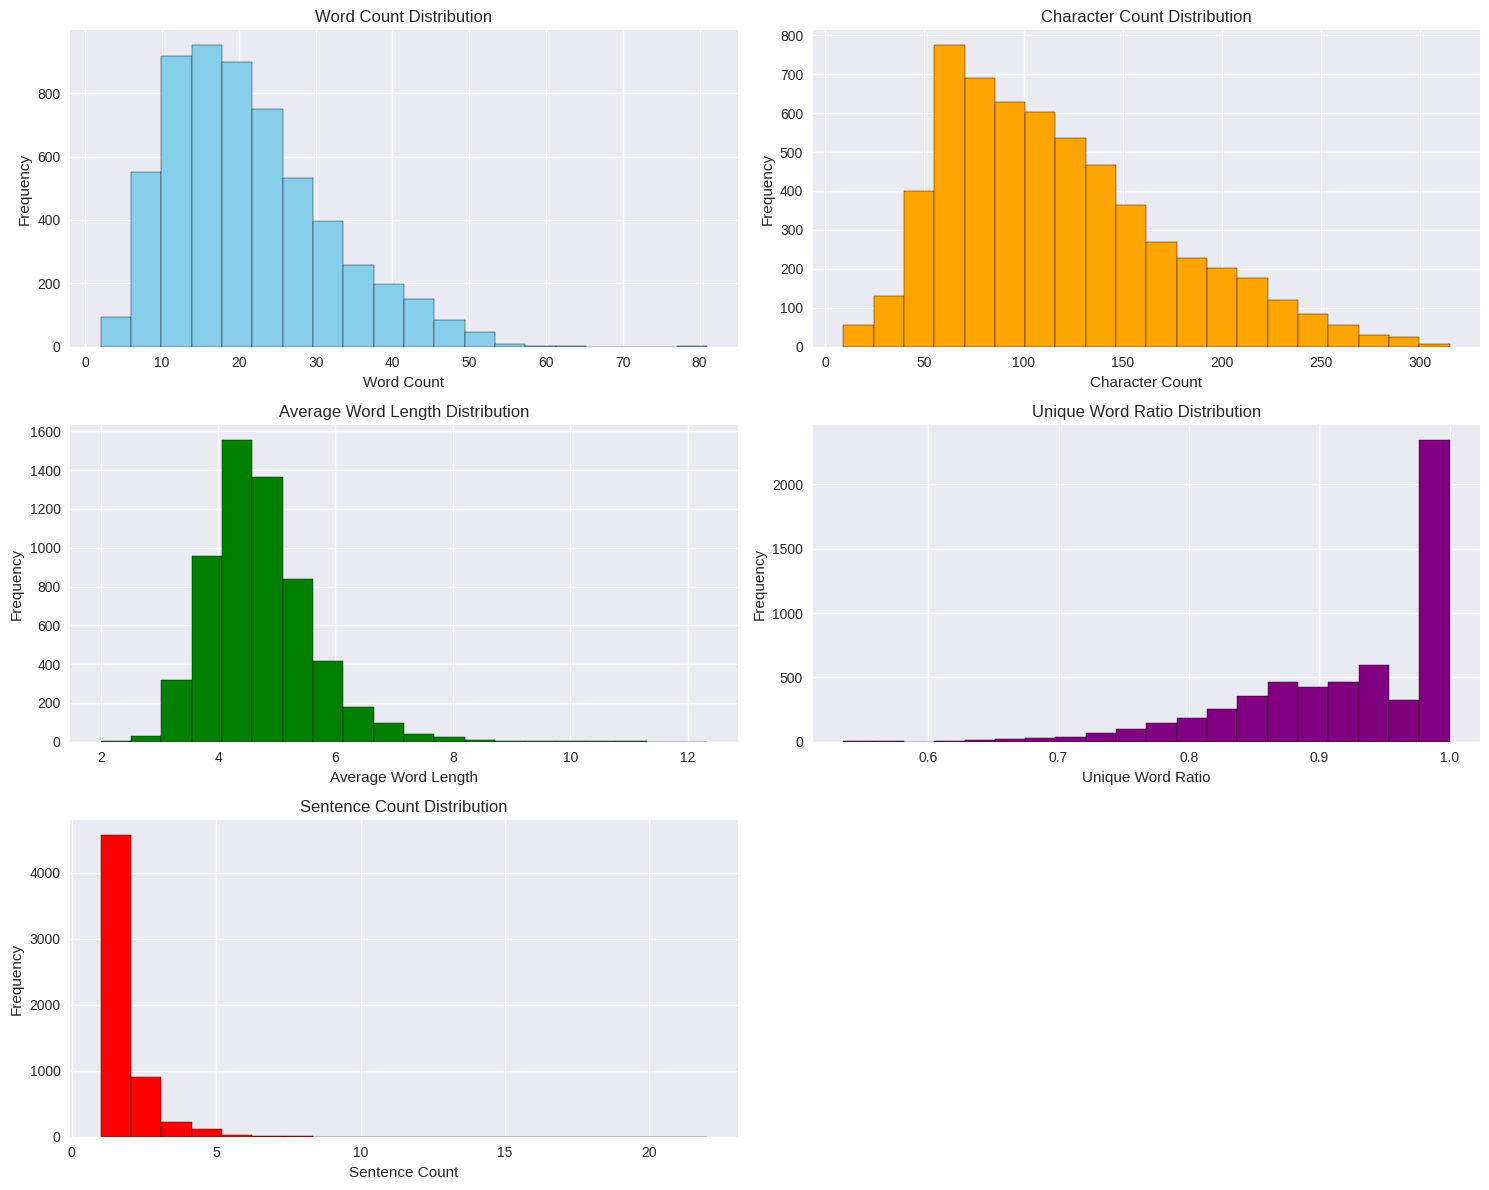

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

# Load the CSV file
df = pd.read_csv("data.csv")  # change path if needed

# Assuming the text is in the first column
text_col = df.columns[0]

# Function to compute features
def extract_features(text):
    if pd.isna(text):
        return pd.Series([0]*10)

    text_str = str(text)
    words = text_str.split()

    word_count = len(words)
    char_count = len(text_str)
    avg_word_length = sum(len(w) for w in words) / word_count if word_count > 0 else 0
    unique_words = set(words)
    unique_word_count = len(unique_words)
    unique_word_ratio = unique_word_count / word_count if word_count > 0 else 0

    sentences = re.split(r'[.!?]+', text_str.strip())
    sentences = [s for s in sentences if s]  # remove empty
    sentence_count = len(sentences)
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0

    punctuation_count = sum(1 for c in text_str if c in string.punctuation)
    digit_count = sum(c.isdigit() for c in text_str)
    uppercase_word_count = sum(1 for w in words if w.isupper())

    return pd.Series([
        word_count,
        char_count,
        avg_word_length,
        unique_word_count,
        unique_word_ratio,
        sentence_count,
        avg_sentence_length,
        punctuation_count,
        digit_count,
        uppercase_word_count
    ])

# Apply function to dataset
df[[
    "word_count",
    "char_count",
    "avg_word_length",
    "unique_word_count",
    "unique_word_ratio",
    "sentence_count",
    "avg_sentence_length",
    "punctuation_count",
    "digit_count",
    "uppercase_word_count"
]] = df[text_col].apply(extract_features)

# Generate 5 graphs
plt.figure(figsize=(15, 12))

# 1. Word count distribution
plt.subplot(3, 2, 1)
plt.hist(df["word_count"], bins=20, color='skyblue', edgecolor='black')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# 2. Character count distribution
plt.subplot(3, 2, 2)
plt.hist(df["char_count"], bins=20, color='orange', edgecolor='black')
plt.title("Character Count Distribution")
plt.xlabel("Character Count")
plt.ylabel("Frequency")

# 3. Average word length distribution
plt.subplot(3, 2, 3)
plt.hist(df["avg_word_length"], bins=20, color='green', edgecolor='black')
plt.title("Average Word Length Distribution")
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")

# 4. Unique word ratio distribution
plt.subplot(3, 2, 4)
plt.hist(df["unique_word_ratio"], bins=20, color='purple', edgecolor='black')
plt.title("Unique Word Ratio Distribution")
plt.xlabel("Unique Word Ratio")
plt.ylabel("Frequency")

# 5. Sentence count distribution
plt.subplot(3, 2, 5)
plt.hist(df["sentence_count"], bins=20, color='red', edgecolor='black')
plt.title("Sentence Count Distribution")
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


/tmp/ipython-input-1485103608.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentence_counts.index, y=sentence_counts.values, palette='viridis')


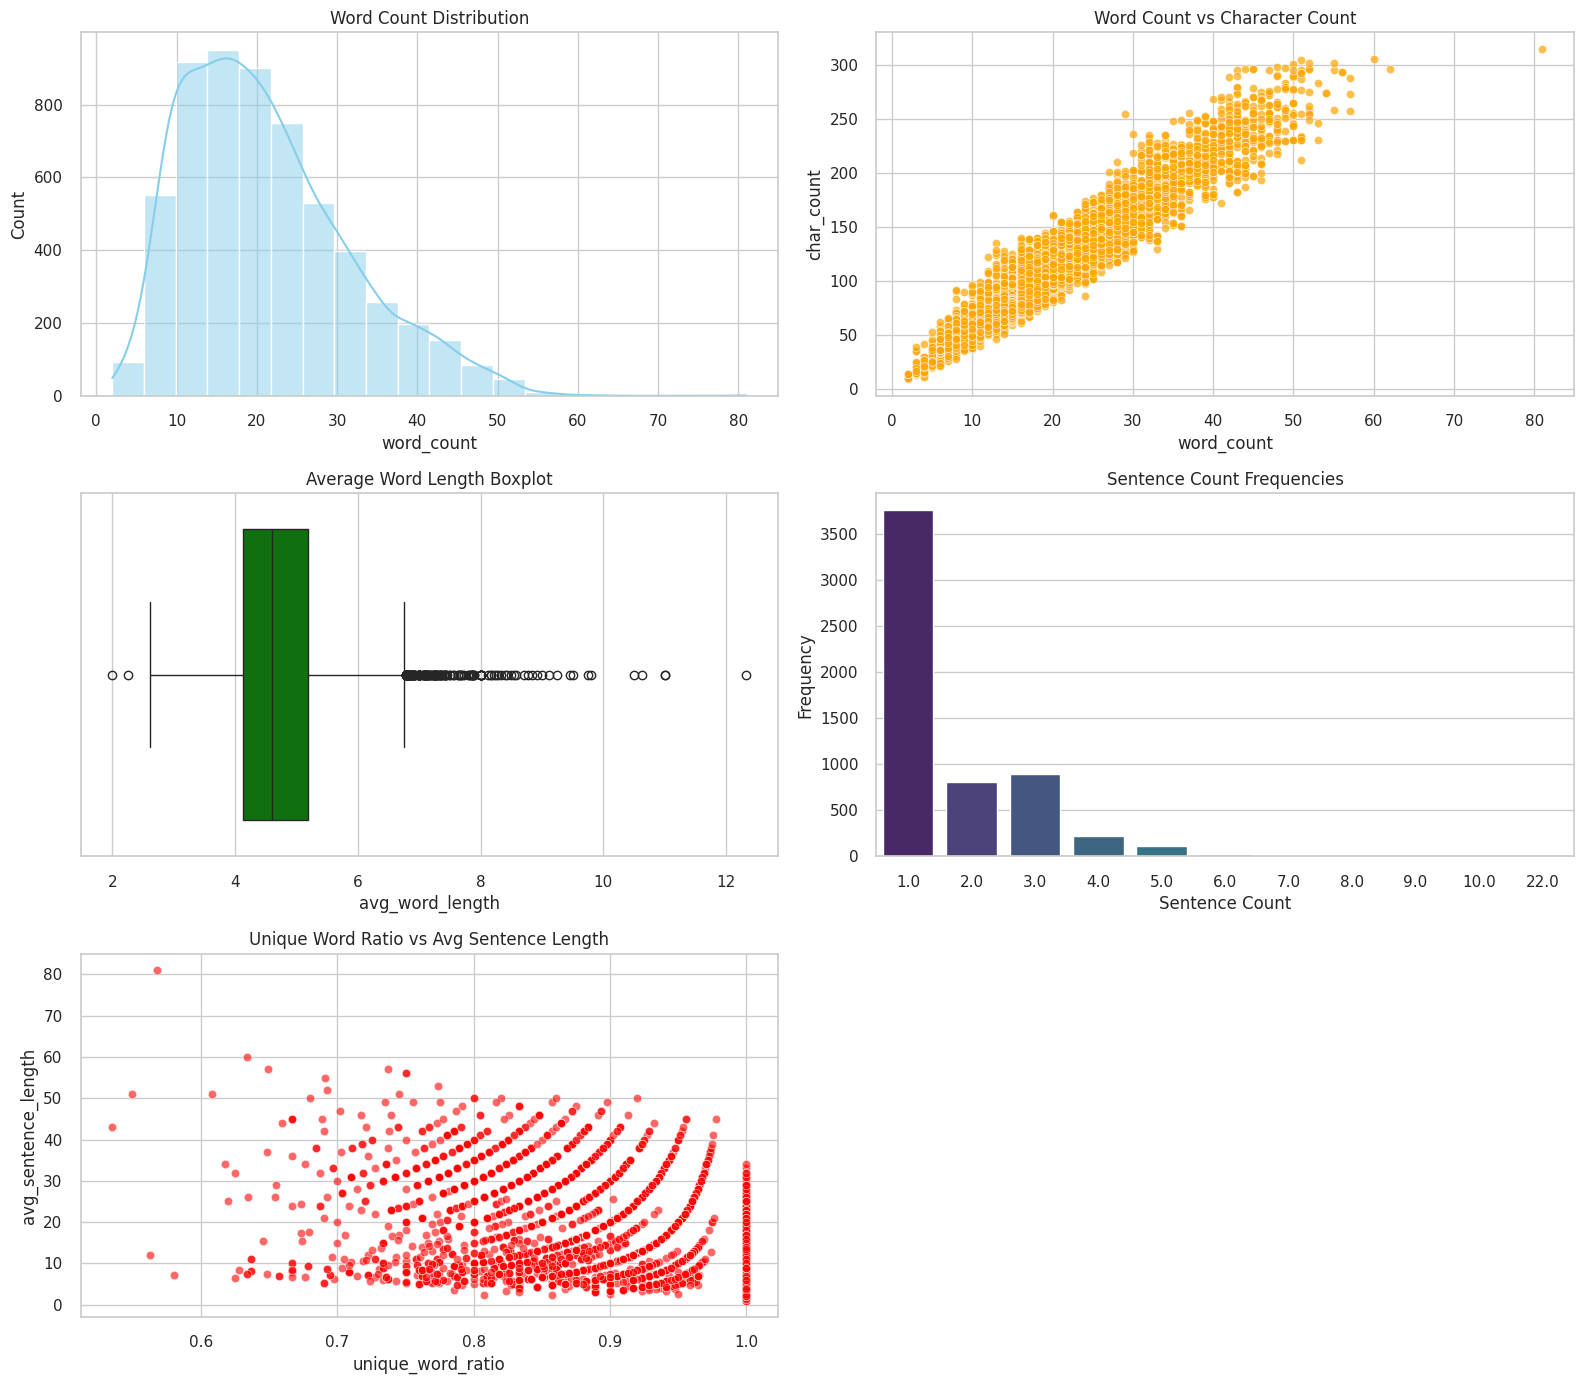

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# Load the CSV file
df = pd.read_csv("data.csv")  # change path if needed

# Assuming the text is in the first column
text_col = df.columns[0]

# Function to compute features
def extract_features(text):
    if pd.isna(text):
        return pd.Series([0]*10)

    text_str = str(text)
    words = text_str.split()

    word_count = len(words)
    char_count = len(text_str)
    avg_word_length = sum(len(w) for w in words) / word_count if word_count > 0 else 0
    unique_words = set(words)
    unique_word_count = len(unique_words)
    unique_word_ratio = unique_word_count / word_count if word_count > 0 else 0

    sentences = re.split(r'[.!?]+', text_str.strip())
    sentences = [s for s in sentences if s]
    sentence_count = len(sentences)
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0

    punctuation_count = sum(1 for c in text_str if c in string.punctuation)
    digit_count = sum(c.isdigit() for c in text_str)
    uppercase_word_count = sum(1 for w in words if w.isupper())

    return pd.Series([
        word_count,
        char_count,
        avg_word_length,
        unique_word_count,
        unique_word_ratio,
        sentence_count,
        avg_sentence_length,
        punctuation_count,
        digit_count,
        uppercase_word_count
    ])

# Apply the function to dataset
df[[
    "word_count",
    "char_count",
    "avg_word_length",
    "unique_word_count",
    "unique_word_ratio",
    "sentence_count",
    "avg_sentence_length",
    "punctuation_count",
    "digit_count",
    "uppercase_word_count"
]] = df[text_col].apply(extract_features)

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Create 5 varied plots
plt.figure(figsize=(16, 14))

# 1. Histogram for Word Count
plt.subplot(3, 2, 1)
sns.histplot(df["word_count"], bins=20, kde=True, color='skyblue')
plt.title("Word Count Distribution")

# 2. Scatter plot: Word Count vs Character Count
plt.subplot(3, 2, 2)
sns.scatterplot(x="word_count", y="char_count", data=df, color='orange', alpha=0.7)
plt.title("Word Count vs Character Count")

# 3. Box plot for Average Word Length
plt.subplot(3, 2, 3)
sns.boxplot(x=df["avg_word_length"], color='green')
plt.title("Average Word Length Boxplot")

# 4. Bar plot of Sentence Count Frequencies
plt.subplot(3, 2, 4)
sentence_counts = df["sentence_count"].value_counts().sort_index()
sns.barplot(x=sentence_counts.index, y=sentence_counts.values, palette='viridis')
plt.title("Sentence Count Frequencies")
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")

# 5. Scatter plot: Unique Word Ratio vs Average Sentence Length
plt.subplot(3, 2, 5)
sns.scatterplot(x="unique_word_ratio", y="avg_sentence_length", data=df, color='red', alpha=0.6)
plt.title("Unique Word Ratio vs Avg Sentence Length")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("data.csv")

# Assuming first column is text, second column is label
text_col = df.columns[0]
label_col = df.columns[1]

X_text = df[text_col]
y = df[label_col]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Split data
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y_encoded, test_size=0.2, random_state=42)

# Define vectorizers
vectorizers = {
    "CountVectorizer": CountVectorizer(),
    "TFIDF": TfidfVectorizer()
}

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# Store results
results = []

for vec_name, vectorizer in vectorizers.items():
    # Transform text
    X_train = vectorizer.fit_transform(X_train_text)
    X_test = vectorizer.transform(X_test_text)

    for model_name, model in models.items():
        # Train
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        results.append([vec_name, model_name, acc, prec, rec, f1])

# Create DataFrame of results
results_df = pd.DataFrame(results, columns=["Vectorizer", "Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(results_df)

# Save results
results_df.to_csv("model_results.csv", index=False)
print("Results saved to model_results.csv")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:35:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:36:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


        Vectorizer          Model  Accuracy  Precision    Recall  F1 Score
0  CountVectorizer    Naive Bayes  0.710864   0.697861  0.710864  0.699219
1  CountVectorizer  Random Forest  0.653550   0.632033  0.653550  0.627074
2  CountVectorizer        XGBoost  0.710864   0.690653  0.710864  0.690542
3            TFIDF    Naive Bayes  0.650128   0.699881  0.650128  0.582086
4            TFIDF  Random Forest  0.656116   0.630303  0.656116  0.631003
5            TFIDF        XGBoost  0.691189   0.671248  0.691189  0.674234
Results saved to model_results.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("data.csv")

# Assuming first column is text, second column is label
text_col = df.columns[0]
label_col = df.columns[1]

X_text = df[text_col]
y = df[label_col]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y_encoded, test_size=0.2, random_state=42
)

# Define vectorizers
vectorizers = {
    "CountVectorizer": CountVectorizer(),
    "TFIDF": TfidfVectorizer()
}

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# Store results
results = []

for vec_name, vectorizer in vectorizers.items():
    # Transform text
    X_train = vectorizer.fit_transform(X_train_text)
    X_test = vectorizer.transform(X_test_text)

    # Feature extraction: list of features (words)
    features = vectorizer.get_feature_names_out()
    print(f"\n=== {vec_name} Extracted {len(features)} Features ===")
    print(features[:20])  # showing only first 20 features

    for model_name, model in models.items():
        # Train
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        results.append([vec_name, model_name, acc, prec, rec, f1])

# Create DataFrame of results
results_df = pd.DataFrame(results, columns=["Vectorizer", "Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n=== Model Results ===")
print(results_df)

# Save results
results_df.to_csv("model_results.csv", index=False)
print("\nResults saved to model_results.csv")



=== CountVectorizer Extracted 10054 Features ===
['00' '000' '000063' '002' '0025' '007' '008' '01' '0101138' '012' '019'
 '02' '023' '027' '03' '030' '031' '035' '03c' '04']


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:43:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== TFIDF Extracted 10054 Features ===
['00' '000' '000063' '002' '0025' '007' '008' '01' '0101138' '012' '019'
 '02' '023' '027' '03' '030' '031' '035' '03c' '04']


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:43:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Model Results ===
        Vectorizer          Model  Accuracy  Precision    Recall  F1 Score
0  CountVectorizer    Naive Bayes  0.710864   0.697861  0.710864  0.699219
1  CountVectorizer  Random Forest  0.653550   0.632033  0.653550  0.627074
2  CountVectorizer        XGBoost  0.710864   0.690653  0.710864  0.690542
3            TFIDF    Naive Bayes  0.650128   0.699881  0.650128  0.582086
4            TFIDF  Random Forest  0.656116   0.630303  0.656116  0.631003
5            TFIDF        XGBoost  0.691189   0.671248  0.691189  0.674234

Results saved to model_results.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate  # for pretty table display

# Load data
df = pd.read_csv("data.csv")

# Assuming first column is text, second column is label
text_col = df.columns[0]
label_col = df.columns[1]

X_text = df[text_col]
y = df[label_col]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y_encoded, test_size=0.2, random_state=42
)

# Define vectorizers
vectorizers = {
    "CountVectorizer": CountVectorizer(),
    "TF-IDF": TfidfVectorizer()
}

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# Store results
results = []

for vec_name, vectorizer in vectorizers.items():
    # Transform text
    X_train = vectorizer.fit_transform(X_train_text)
    X_test = vectorizer.transform(X_test_text)

    for model_name, model in models.items():
        # Train
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        results.append([
            model_name, vec_name,
            round(acc, 2), round(prec, 2), round(rec, 2), round(f1, 2)
        ])

# Create DataFrame of results
results_df = pd.DataFrame(results, columns=["Model", "Feature Extraction", "Accuracy", "Precision", "Recall", "F1-Score"])

# Pretty print like in your screenshot
print(tabulate(results_df, headers='keys', tablefmt='github', showindex=False))

# Save results
results_df.to_csv("model_results.csv", index=False)
print("\nResults saved to model_results.csv")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:46:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:47:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


| Model         | Feature Extraction   |   Accuracy |   Precision |   Recall |   F1-Score |
|---------------|----------------------|------------|-------------|----------|------------|
| Naive Bayes   | CountVectorizer      |       0.71 |        0.7  |     0.71 |       0.7  |
| Random Forest | CountVectorizer      |       0.65 |        0.63 |     0.65 |       0.63 |
| XGBoost       | CountVectorizer      |       0.71 |        0.69 |     0.71 |       0.69 |
| Naive Bayes   | TF-IDF               |       0.65 |        0.7  |     0.65 |       0.58 |
| Random Forest | TF-IDF               |       0.66 |        0.63 |     0.66 |       0.63 |
| XGBoost       | TF-IDF               |       0.69 |        0.67 |     0.69 |       0.67 |

Results saved to model_results.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import numpy as np

# Load data
df = pd.read_csv("data.csv")

# Assuming first column is text, second column is label
text_col = df.columns[0]
label_col = df.columns[1]

X_text = df[text_col]
y = df[label_col]

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y_encoded, test_size=0.2, random_state=42
)

# Vectorizers
vectorizers = {
    "CountVectorizer": CountVectorizer(),
    "TF-IDF": TfidfVectorizer()
}

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# Store results
results = []
cv_results = []

for vec_name, vectorizer in vectorizers.items():
    # Transform text
    X_train = vectorizer.fit_transform(X_train_text)
    X_test = vectorizer.transform(X_test_text)
    X_all = vectorizer.fit_transform(X_text)  # For cross-validation

    for model_name, model in models.items():
        # Train/test evaluation
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        results.append([
            model_name, vec_name,
            round(acc, 2), round(prec, 2), round(rec, 2), round(f1, 2)
        ])

        # Cross-validation (5-fold)
        cv_scores = cross_val_score(model, X_all, y_encoded, cv=5, scoring='accuracy')
        cv_results.append([
            model_name, vec_name,
            round(np.mean(cv_scores), 2), round(np.std(cv_scores), 2)
        ])

# Convert to DataFrames
results_df = pd.DataFrame(results, columns=["Model", "Feature Extraction", "Accuracy", "Precision", "Recall", "F1-Score"])
cv_results_df = pd.DataFrame(cv_results, columns=["Model", "Feature Extraction", "CV Mean Accuracy", "CV Std"])

# Print tables
print("\n### Train/Test Split Results ###")
print(tabulate(results_df, headers='keys', tablefmt='github', showindex=False))

print("\n### Cross-Validation Results (5-Fold) ###")
print(tabulate(cv_results_df, headers='keys', tablefmt='github', showindex=False))

# Save to CSV
results_df.to_csv("model_results.csv", index=False)
cv_results_df.to_csv("crossval_results.csv", index=False)

print("\nResults saved to model_results.csv and crossval_results.csv")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:15:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:15:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:15:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:15:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:15:54] WARNING: /w


### Train/Test Split Results ###
| Model         | Feature Extraction   |   Accuracy |   Precision |   Recall |   F1-Score |
|---------------|----------------------|------------|-------------|----------|------------|
| Naive Bayes   | CountVectorizer      |       0.71 |        0.7  |     0.71 |       0.7  |
| Random Forest | CountVectorizer      |       0.65 |        0.63 |     0.65 |       0.63 |
| XGBoost       | CountVectorizer      |       0.71 |        0.69 |     0.71 |       0.69 |
| Naive Bayes   | TF-IDF               |       0.65 |        0.7  |     0.65 |       0.58 |
| Random Forest | TF-IDF               |       0.66 |        0.63 |     0.66 |       0.63 |
| XGBoost       | TF-IDF               |       0.69 |        0.67 |     0.69 |       0.67 |

### Cross-Validation Results (5-Fold) ###
| Model         | Feature Extraction   |   CV Mean Accuracy |   CV Std |
|---------------|----------------------|--------------------|----------|
| Naive Bayes   | CountVectorizer      | 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load your data
df = pd.read_csv("data.csv")
text_col = df.columns[0]  # First column: text
label_col = df.columns[1]  # Second column: label

X_text = df[text_col]
y = df[label_col]

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y_encoded, test_size=0.2, random_state=42
)

# Define vectorizers
vectorizers = {
    "CountVectorizer": CountVectorizer(),
    "TF-IDF": TfidfVectorizer()
}

# Parameter grids for each model
param_grids = {
    "Naive Bayes": {"alpha": [0.1, 0.5, 1.0]},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
    "XGBoost": {"n_estimators": [100, 200], "max_depth": [3, 5, 7]}
}

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# Store results
final_results = []

for vec_name, vectorizer in vectorizers.items():
    print(f"\n--- {vec_name} ---")
    X_train_vec = vectorizer.fit_transform(X_train_text)
    X_test_vec = vectorizer.transform(X_test_text)

    for model_name, model in models.items():
        print(f"\nTuning {model_name} with {vec_name}...")

        grid = GridSearchCV(model, param_grids[model_name], cv=5, scoring="accuracy", n_jobs=-1)
        grid.fit(X_train_vec, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_vec)

        acc = accuracy_score(y_test, y_pred)
        print(f"Best Params: {grid.best_params_}")
        print(f"Best CV Score: {grid.best_score_:.4f}")
        print(f"Test Accuracy: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        final_results.append([model_name, vec_name, grid.best_params_, round(acc, 4)])

# Convert results to DataFrame and save
results_df = pd.DataFrame(final_results, columns=["Model", "Vectorizer", "Best Params", "Test Accuracy"])
results_df.to_csv("crossval_results.csv", index=False)
print("\nAll results saved to crossval_results.csv")



--- CountVectorizer ---

Tuning Naive Bayes with CountVectorizer...
Best Params: {'alpha': 1.0}
Best CV Score: 0.6927
Test Accuracy: 0.7109
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.31      0.37       175
           1       0.74      0.86      0.79       622
           2       0.74      0.65      0.70       372

    accuracy                           0.71      1169
   macro avg       0.65      0.61      0.62      1169
weighted avg       0.70      0.71      0.70      1169


Tuning Random Forest with CountVectorizer...
Best Params: {'max_depth': None, 'n_estimators': 200}
Best CV Score: 0.6396
Test Accuracy: 0.6518
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.08      0.11       175
           1       0.66      0.86      0.74       622
           2       0.80      0.57      0.67       372

    accuracy                           0.65      1169
   macro avg    

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:46:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'max_depth': 3, 'n_estimators': 200}
Best CV Score: 0.6978
Test Accuracy: 0.7177
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.19      0.27       175
           1       0.72      0.89      0.79       622
           2       0.80      0.68      0.74       372

    accuracy                           0.72      1169
   macro avg       0.65      0.59      0.60      1169
weighted avg       0.70      0.72      0.70      1169


--- TF-IDF ---

Tuning Naive Bayes with TF-IDF...
Best Params: {'alpha': 0.5}
Best CV Score: 0.6694
Test Accuracy: 0.6861
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.07      0.12       175
           1       0.67      0.96      0.79       622
           2       0.73      0.51      0.60       372

    accuracy                           0.69      1169
   macro avg       0.69      0.52      0.51      1169
weighted avg       0.69      

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:56:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'max_depth': 3, 'n_estimators': 100}
Best CV Score: 0.6786
Test Accuracy: 0.6886
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.15      0.21       175
           1       0.68      0.89      0.77       622
           2       0.79      0.61      0.69       372

    accuracy                           0.69      1169
   macro avg       0.61      0.55      0.56      1169
weighted avg       0.67      0.69      0.66      1169


All results saved to crossval_results.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv("data.csv")

# Assuming first column is text and second column is labels
text_col = df.columns[0]
label_col = df.columns[1]

X_text = df[text_col]
y = df[label_col]

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y_encoded, test_size=0.2, random_state=42
)

# Vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transform text
X_train_counts = count_vectorizer.fit_transform(X_train_text)
X_test_counts = count_vectorizer.transform(X_test_text)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Parameter grid for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100]}

# CountVectorizer model tuning
grid_search_counts = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search_counts.fit(X_train_counts, y_train)

print("Best parameters for CountVectorizer model:", grid_search_counts.best_params_)
print("Best cross-validation score for CountVectorizer model:", grid_search_counts.best_score_)

# Evaluate tuned CountVectorizer model
best_model_counts = grid_search_counts.best_estimator_
y_pred_counts_tuned = best_model_counts.predict(X_test_counts)
accuracy_counts_tuned = accuracy_score(y_test, y_pred_counts_tuned)
print(f"\nFine-tuned Model Accuracy (CountVectorizer): {accuracy_counts_tuned}")
print("Classification Report (CountVectorizer - Tuned):")
print(classification_report(y_test, y_pred_counts_tuned))

# TF-IDF model tuning
grid_search_tfidf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search_tfidf.fit(X_train_tfidf, y_train)

print("\nBest parameters for TF-IDF model:", grid_search_tfidf.best_params_)
print("Best cross-validation score for TF-IDF model:", grid_search_tfidf.best_score_)

# Evaluate tuned TF-IDF model
best_model_tfidf = grid_search_tfidf.best_estimator_
y_pred_tfidf_tuned = best_model_tfidf.predict(X_test_tfidf)
accuracy_tfidf_tuned = accuracy_score(y_test, y_pred_tfidf_tuned)
print(f"\nFine-tuned Model Accuracy (TF-IDF): {accuracy_tfidf_tuned}")
print("Classification Report (TF-IDF - Tuned):")
print(classification_report(y_test, y_pred_tfidf_tuned))

# Compare which performed better
print("\n--- Model Comparison ---")
if accuracy_counts_tuned > accuracy_tfidf_tuned:
    print("The fine-tuned CountVectorizer model performed better.")
elif accuracy_counts_tuned < accuracy_tfidf_tuned:
    print("The fine-tuned TF-IDF model performed better.")
else:
    print("Both models performed equally well.")


Best parameters for CountVectorizer model: {'C': 0.1}
Best cross-validation score for CountVectorizer model: 0.687348761579773

Fine-tuned Model Accuracy (CountVectorizer): 0.7117194183062446
Classification Report (CountVectorizer - Tuned):
              precision    recall  f1-score   support

           0       0.43      0.17      0.24       175
           1       0.71      0.87      0.78       622
           2       0.77      0.70      0.73       372

    accuracy                           0.71      1169
   macro avg       0.64      0.58      0.58      1169
weighted avg       0.69      0.71      0.69      1169


Best parameters for TF-IDF model: {'C': 1}
Best cross-validation score for TF-IDF model: 0.6907721375488097

Fine-tuned Model Accuracy (TF-IDF): 0.7151411462788708
Classification Report (TF-IDF - Tuned):
              precision    recall  f1-score   support

           0       0.49      0.14      0.22       175
           1       0.71      0.90      0.79       622
          

In [ ]:
# Compare the accuracies of the fine-tuned models
print(f"Fine-tuned Model Accuracy (CountVectorizer): {accuracy_counts_tuned}")
print(f"Fine-tuned Model Accuracy (TF-IDF): {accuracy_tfidf_tuned}")

if accuracy_counts_tuned > accuracy_tfidf_tuned:
    print("\nThe fine-tuned CountVectorizer model performed better.")
else:
    print("\nThe fine-tuned TF-IDF model performed better.")

Fine-tuned Model Accuracy (CountVectorizer): 0.7117194183062446
Fine-tuned Model Accuracy (TF-IDF): 0.7151411462788708

The fine-tuned TF-IDF model performed better.


In [ ]:
from tabulate import tabulate

# Compare accuracies
comparison_data = [
    ["CountVectorizer", f"{accuracy_counts_tuned*100:.2f}%" + (" ✅" if accuracy_counts_tuned > accuracy_tfidf_tuned else "")],
    ["TF-IDF", f"{accuracy_tfidf_tuned*100:.2f}%" + (" ✅" if accuracy_tfidf_tuned > accuracy_counts_tuned else "")]
]

print("\n--- Model Accuracy Comparison ---")
print(tabulate(comparison_data, headers=["Model", "Accuracy"], tablefmt="grid"))

# Final verdict
if accuracy_counts_tuned > accuracy_tfidf_tuned:
    print("\nResult: The fine-tuned CountVectorizer model performed better.")
elif accuracy_counts_tuned < accuracy_tfidf_tuned:
    print("\nResult: The fine-tuned TF-IDF model performed better.")
else:
    print("\nResult: Both models performed equally well.")



--- Model Accuracy Comparison ---
+-----------------+------------+
| Model           | Accuracy   |
+=================+============+
| CountVectorizer | 71.17%     |
+-----------------+------------+
| TF-IDF          | 71.51% ✅  |
+-----------------+------------+

Result: The fine-tuned TF-IDF model performed better.


In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.preprocessing import LabelEncoder

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# ---------------- TEXT CLEANING ----------------
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# ---------------- LOAD DATA ----------------
df = pd.read_csv("/content/data.csv")

# Change 'text_column' & 'label_column' to your actual column names
text_col = 'Sentence'  # Replace with your text column
label_col = 'Sentiment'  # Replace with your label column

df[text_col] = df[text_col].astype(str).apply(clean_text)

X = df[text_col]
y = df[label_col]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ---------------- VECTORIZERS ----------------
vectorizers = {
    "CountVectorizer": CountVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=2),
    "TF-IDF": TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=2)
}

# ---------------- MODELS & PARAMS ----------------
models = {
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    }),
    "NaiveBayes": (MultinomialNB(), {
        'alpha': [0.5, 1.0, 1.5]
    }),
    "XGBoost": (XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.1, 0.3]
    })
}

# ---------------- TRAIN & EVALUATE ----------------
results = []

for vec_name, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    for model_name, (model, params) in models.items():
        print(f"\n🔍 Tuning {model_name} with {vec_name}...")
        grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_vec, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_vec)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        print(f"✅ Best Params: {grid_search.best_params_}")
        print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")
        print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

        results.append({
            'Vectorizer': vec_name,
            'Model': model_name,
            'Best_Params': grid_search.best_params_,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-score': f1
        })

# ---------------- RESULTS COMPARISON ----------------
results_df = pd.DataFrame(results)
print("\n📊 All Results:")
print(results_df)

# Find best models for each vectorizer
best_count = results_df[results_df['Vectorizer'] == "CountVectorizer"].sort_values(by="Accuracy", ascending=False).iloc[0]
best_tfidf = results_df[results_df['Vectorizer'] == "TF-IDF"].sort_values(by="Accuracy", ascending=False).iloc[0]

print(f"\n🏆 Best CountVectorizer Model: {best_count['Model']} with Accuracy {best_count['Accuracy']:.4f}")
print(f"🏆 Best TF-IDF Model: {best_tfidf['Model']} with Accuracy {best_tfidf['Accuracy']:.4f}")

if best_count['Accuracy'] > best_tfidf['Accuracy']:
    print("\n🎯 The fine-tuned CountVectorizer model performed better.")
else:
    print("\n🎯 The fine-tuned TF-IDF model performed better.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



🔍 Tuning RandomForest with CountVectorizer...
✅ Best Params: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.6647, Precision: 0.6475, Recall: 0.6647, F1-score: 0.6505
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.17      0.20       175
           1       0.68      0.81      0.74       622
           2       0.78      0.66      0.71       372

    accuracy                           0.66      1169
   macro avg       0.57      0.54      0.55      1169
weighted avg       0.65      0.66      0.65      1169


🔍 Tuning NaiveBayes with CountVectorizer...
✅ Best Params: {'alpha': 1.5}
Accuracy: 0.7006, Precision: 0.6835, Recall: 0.7006, F1-score: 0.6894
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.26      0.32       175
           1       0.77      0.81      0.79       622
           2       0.68      0.72      0.70       372

    accuracy                       

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:55:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Params: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.6766, Precision: 0.6587, Recall: 0.6766, F1-score: 0.6534
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.18      0.24       175
           1       0.68      0.87      0.76       622
           2       0.77      0.59      0.67       372

    accuracy                           0.68      1169
   macro avg       0.60      0.55      0.56      1169
weighted avg       0.66      0.68      0.65      1169


🔍 Tuning RandomForest with TF-IDF...
✅ Best Params: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.6518, Precision: 0.6307, Recall: 0.6518, F1-score: 0.6348
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.14      0.18       175
           1       0.67      0.81      0.74       622
           2       0.75      0.63      0.68       372

    accuracy                           0.65 

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:02:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Params: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.6595, Precision: 0.6376, Recall: 0.6595, F1-score: 0.6343
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.14      0.19       175
           1       0.67      0.86      0.75       622
           2       0.75      0.57      0.65       372

    accuracy                           0.66      1169
   macro avg       0.57      0.52      0.53      1169
weighted avg       0.64      0.66      0.63      1169


📊 All Results:
        Vectorizer         Model  \
0  CountVectorizer  RandomForest   
1  CountVectorizer    NaiveBayes   
2  CountVectorizer       XGBoost   
3           TF-IDF  RandomForest   
4           TF-IDF    NaiveBayes   
5           TF-IDF       XGBoost   

                                         Best_Params  Accuracy  Precision  \
0           {'max_depth': None, 'n_estimators': 200}  0.664671   0.647462   
1                          